In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("filippoo/deep-learning-az-ann")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/deep-learning-az-ann


In [2]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [3]:
data=pd.read_csv(path+"/Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**EDA**

In [4]:
data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
data.shape

(10000, 14)

In [7]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


array([[<Axes: title={'center': 'RowNumber'}>,
        <Axes: title={'center': 'CustomerId'}>,
        <Axes: title={'center': 'CreditScore'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Balance'}>],
       [<Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>,
        <Axes: title={'center': 'IsActiveMember'}>],
       [<Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>, <Axes: >]], dtype=object)

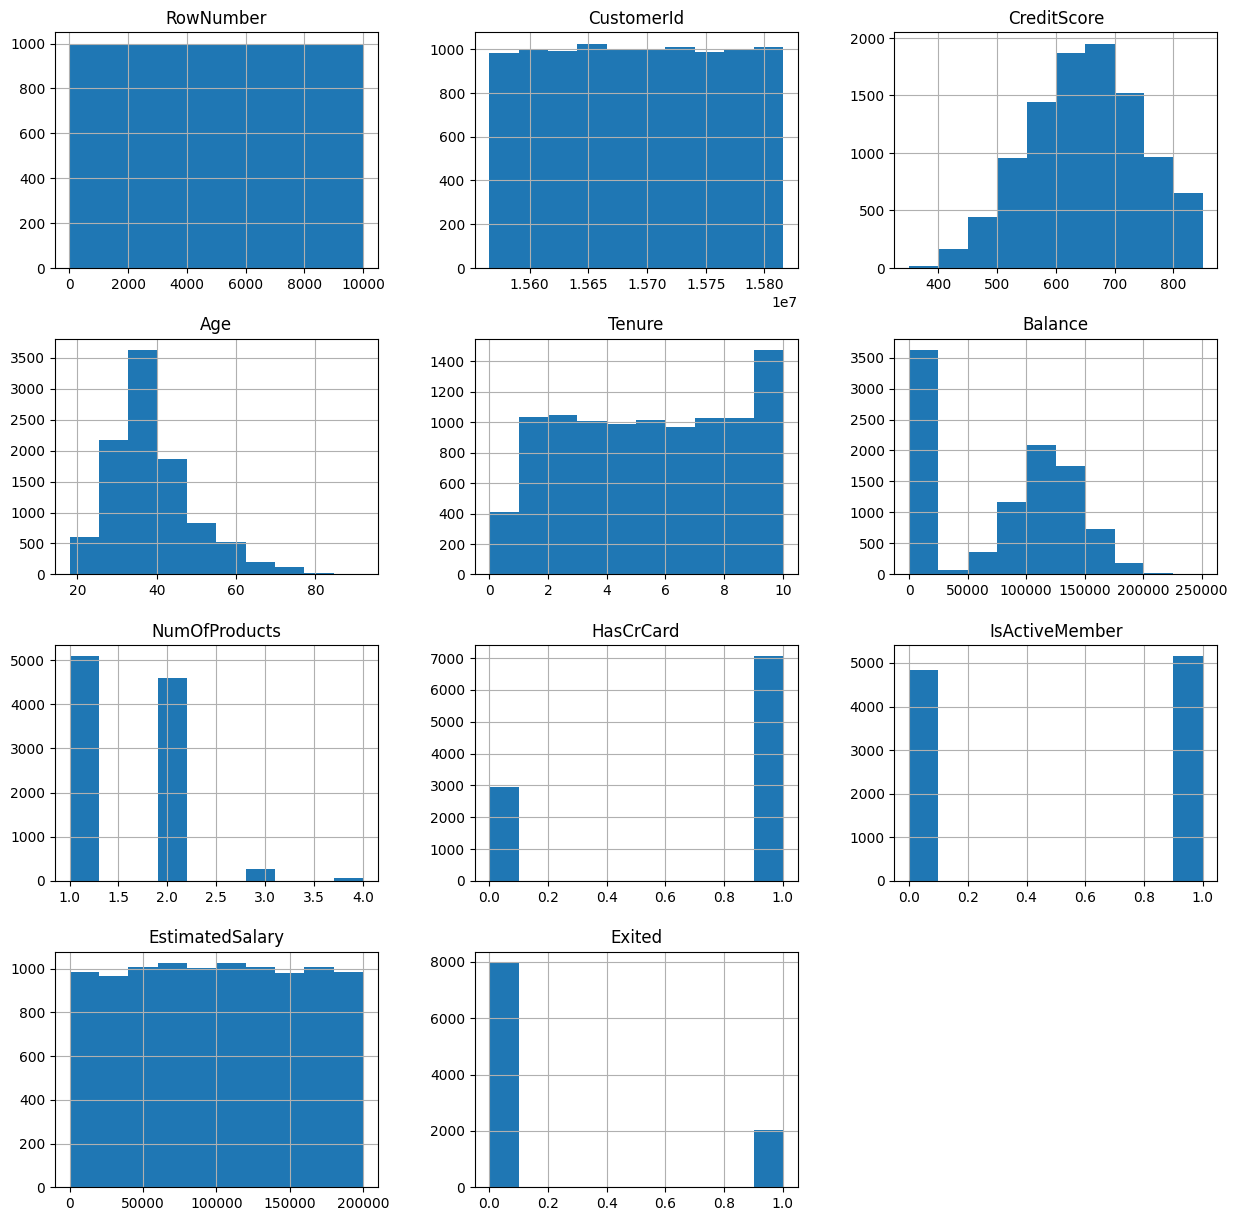

In [8]:
data.hist(figsize=(15,15))

Feature **Engineering**

In [9]:
# rownumber , customerids, surnames  are not so much relevent
data=data.drop(["RowNumber","CustomerId","Surname"],axis=1)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [11]:
#Encoding on categorical columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["Gender"]=le.fit_transform(data["Gender"])

In [12]:
data= pd.get_dummies(data, columns=['Geography'], drop_first=True)

<Axes: >

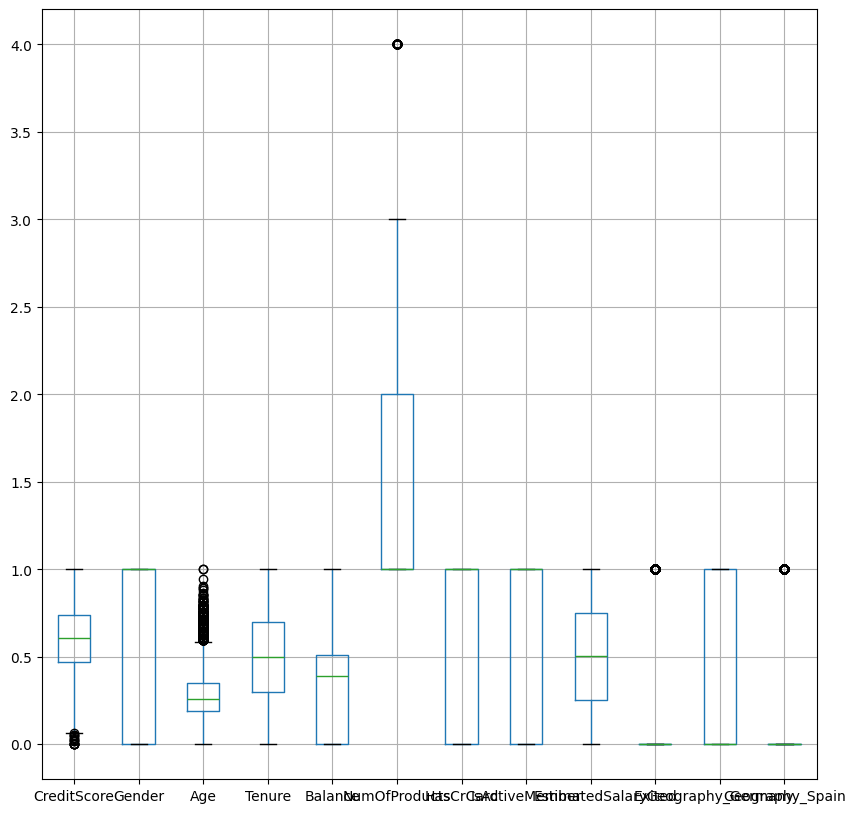

In [35]:
data.boxplot(figsize=(10,10))

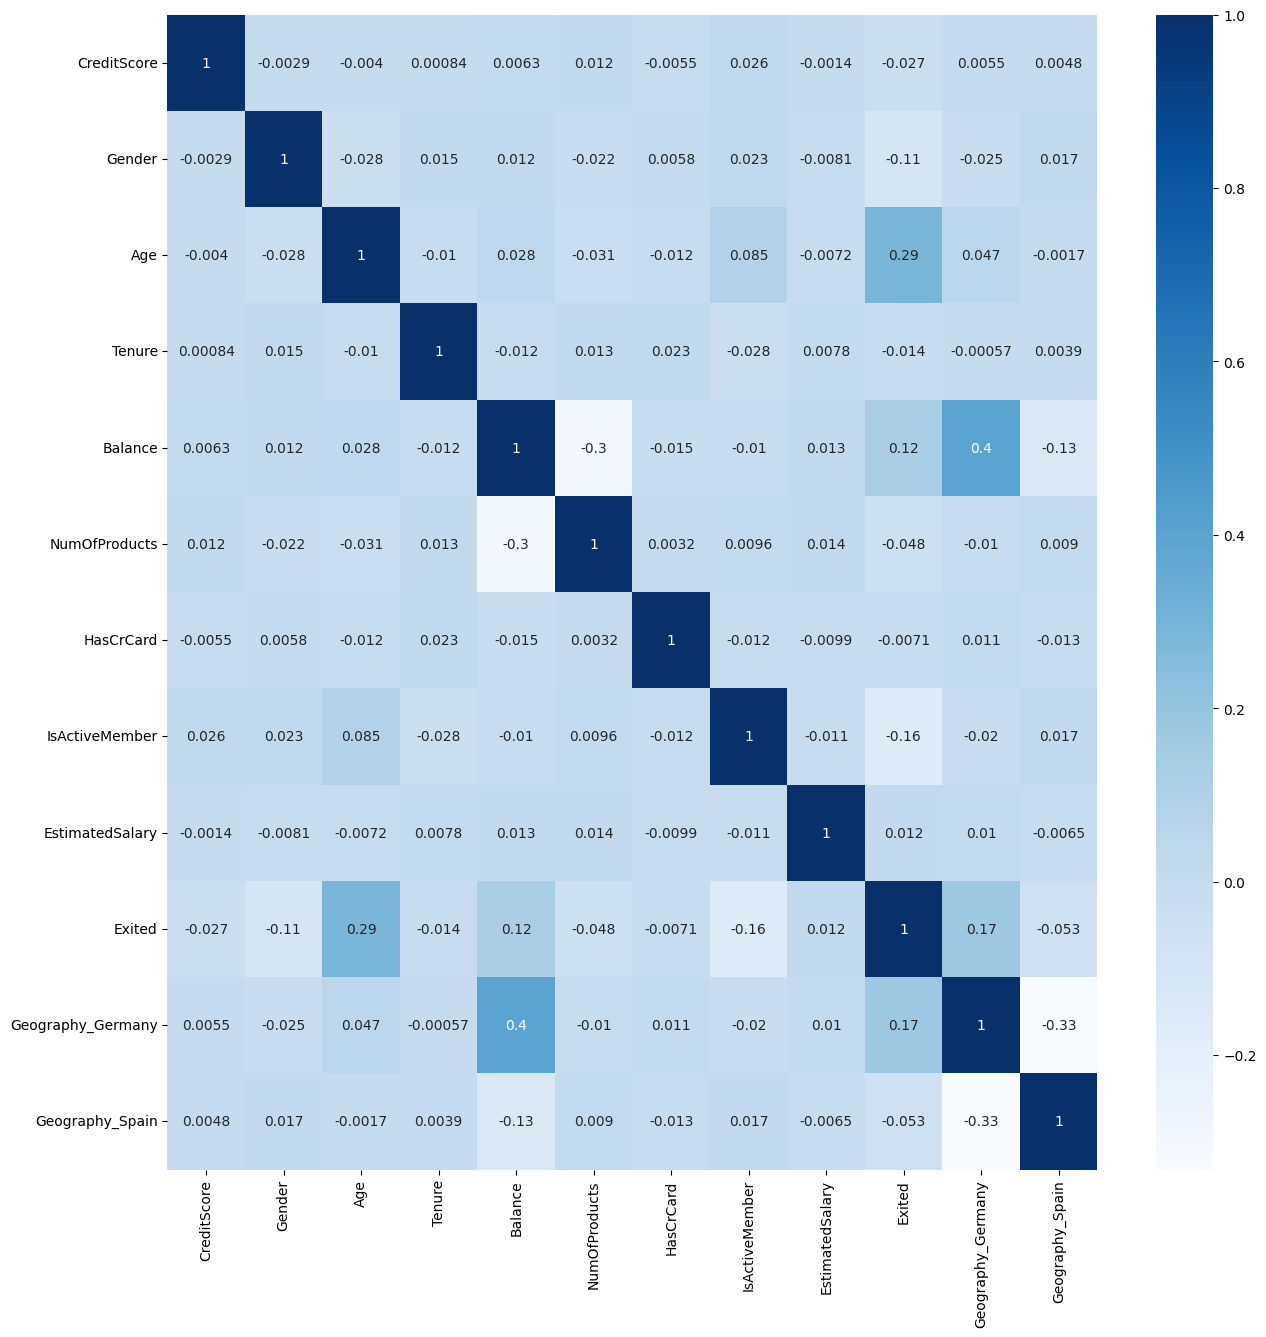

In [14]:
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr(), annot=True, cmap="Blues")
plt.show()

**Feature** **scaling**

In [15]:
from sklearn.preprocessing import MinMaxScaler
model = MinMaxScaler()
cols_to_scale = ['EstimatedSalary', 'CreditScore', 'Balance','Age','Tenure']
data[cols_to_scale] = model.fit_transform(data[cols_to_scale])


**Splitting**

In [16]:
x=data.drop(['Exited'],axis=1)
y=data['Exited']

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

ModelBuilding

In [28]:
MODEL=Sequential([
    Dense(128,activation="relu",input_shape=(x_train.shape[1],)),
    Dropout(0.2),
    Dense(64,activation="relu"),
    Dense(32,activation="relu"),
    Dense(16,activation="relu"),
    Dense(1,activation="sigmoid")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
MODEL.compile(optimizer='adam',loss="binary_crossentropy",metrics=["accuracy"])

In [30]:
history=MODEL.fit(x_train,y_train,epochs=35,validation_data=(x_test,y_test),batch_size=24)
history

Epoch 1/35
292/292 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7957 - loss: 0.5072 - val_accuracy: 0.8137 - val_loss: 0.4357
Epoch 2/35
292/292 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8048 - loss: 0.4509 - val_accuracy: 0.8340 - val_loss: 0.3942
Epoch 3/35
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8277 - loss: 0.4065 - val_accuracy: 0.8307 - val_loss: 0.3974
Epoch 4/35
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8286 - loss: 0.3950 - val_accuracy: 0.8530 - val_loss: 0.3611
Epoch 5/35
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8438 - loss: 0.3776 - val_accuracy: 0.8543 - val_loss: 0.3569
Epoch 6/35
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8452 - loss: 0.3638 - val_accuracy: 0.8620 - val_loss: 0.3452
Epoch 7/35
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8504 - loss: 0.3611 - val_accuracy: 0.8613 - val_loss: 0.3445
Epoch 8/35
292/292 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8519 - loss: 0.3633 - val_accuracy: 0.

**Visulization**

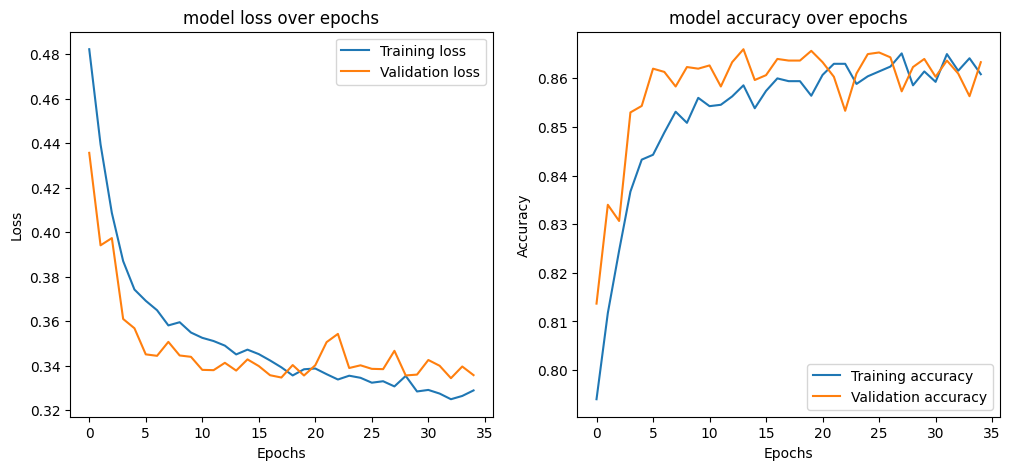

In [31]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history["loss"],label="Training loss")
plt.plot(history.history["val_loss"],label="Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("model loss over epochs")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["accuracy"],label="Training accuracy")
plt.plot(history.history["val_accuracy"],label="Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("model accuracy over epochs")
plt.legend()

EVALUTION AND PREDICTIONS

In [32]:
test_loss, test_accuracy = MODEL.evaluate(x_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:}")
print(f"Test Accuracy: {test_accuracy:}")


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8606 - loss: 0.3381
Test Loss: 0.33581873774528503
Test Accuracy: 0.8633333444595337


In [33]:
y_pred_accurate = MODEL.predict(x_test)
y_pred=(y_pred_accurate > 0.5).astype("int32")
y_pred

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[2301  115]
 [ 295  289]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      2416
           1       0.72      0.49      0.59       584

    accuracy                           0.86      3000
   macro avg       0.80      0.72      0.75      3000
weighted avg       0.85      0.86      0.85      3000

